#**Milestones 2 Phase 2**
## **Sentiment Analysis about Medicines by Using Consumers Reviews**
*December 7th, 2022*

Nadia Oktiarsy, FSDS Batch-016 RMT (*Buddy: Fahmi*)

---
```
Table of Contents:
1. Introduction
   Problem Statements
2. Importing Libraries
3. Data Loading
4. Exploratory Data Analysis (EDA)
5. Data Preprocessing
6. Model Definition
7. Model Training
8. Model Evaluation
9. Model Saving
10. Model Inference
11. Conclusion
   Business Insights
   Model Insights
```

---

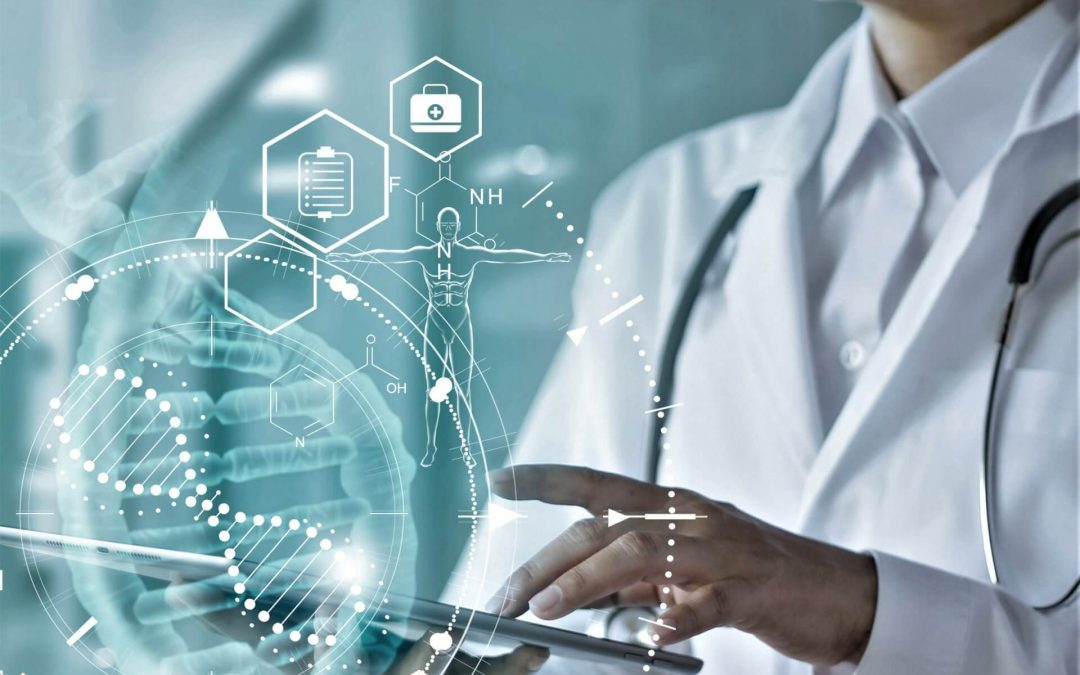

## **1. Introduction**

Consumer reviews are the most important factor to develop a business. However, consumer reviews can potentially change someone's life if it is all about medical and health care, one of them is medicines reviews. Although ideally, medicines should not be commericialized for public because the consumption should be based on patient's doctors, however, the evaluating a medicine reviews can help doctors and pharmacies to study more about the side effects based on patients or consumers experience.

In the reviews, consumers post ratings and reviews on drugs they have consumed. These medicine reviews should be easily accessible and comprehensible because it is directly from consumers, unlike clinical trials and published literature. Because of its open information that can be accessed by public, it is important to know whether such information is reliable or not.

### **Problem Statements**

Since consumer's reviews and rating are parts of each consumer's experience of the medicine consumed, then sentimental analysis will be applied in this discussion.

**Sentiment analysis main question**: How many people that have positive and negative sentiment towards the medicines sold?

- What elements of a review make it more helpful to others
- Which patients tend to have more negative and positive reviews?

**Objective**: To determine if reviews are mostly positive or negative.

## **2. Importing Libraries**

In [4]:
# Installing libraries for google colaboratory
%pip install scikit-learn==1.1.3
%pip install chart_studio
%pip install tensorflow-addons
%pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 153.1/153.1 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
##### IMPORT ALL LIBRARIES #####

# Import Libraries
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy import stats
import sys
import sklearn
import nltk
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

# Data visualization libraries
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import iplot, plot
from plotly import subplots

# Classification Libraries
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer

# Dictionary Libraries
from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict

# Preprocessing Libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.stem.snowball import SnowballStemmer
import re
import string      # Deleting punctuation from review columns
from bs4 import BeautifulSoup  # HTML parser

# Downloading dictionary and punctuation
nltk.download('stopwords')
nltk.download('punkt')
nltk.download ('wordnet')
nltk.download('omw-1.4')

# Neural Network Libraries (Keras and Tensorflow)
from tensorflow import keras
from tensorflow.keras.layers import TextVectorization, Embedding, Dense, GlobalAveragePooling1D, Input, Dropout, LSTM
from tensorflow.keras.models import Model, Sequential
import tensorflow_addons as tfa

# Save and Load Model
import joblib
import json

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Okti\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Okti\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Okti\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Okti\AppData\Roaming\nltk_data...


## **3. Data Loading**

The data used is taken from Kaggle: [UCI ML Drug Review dataset](https://www.kaggle.com/datasets/jessicali9530/kuc-hackathon-winter-2018)

- Which the original data is basically from Machine Learning Repositories UCI: [Drug Review Dataset (Drugs.com) Data Set](https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29)

There are six (6) attributes that will be included in this sentiment analysis, as the attribute information below:

Header | Definition
---|---
`uniqueID` | customer's ID
`drugName` | name of drug (categorical)
`condition` | name of condition (categorical)
`review` | patient review (text)
`rating` | 1-10 star patient rating (numerical)
`date` | date of review entry (date)
`usefulCount` | number of users who found review useful (numerical)

The raw dataset has 161,297 unique data with 7 attributes or columns. Since this will be a sentiment analysis, there will be an additional column that indicates `sentiment` based on catagorizing rating. For example:
- Rating 1-5 is categorized as `negative sentiment`
- Rating 6-10 is categorized as `positive sentiment`

In [8]:
url = 'drugsComTrain_raw.csv'
df = pd.read_csv(url)
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [9]:
df.tail()

,uniqueID,drugName,condition,review,rating,date,usefulCount
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79
161296,215220,Lubiprostone,"Constipation, Chronic","""I&#039;ve had chronic constipation all my adu...",9,13-Dec-14,116


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


Based on the dataset summary, we can see that form 161,297 data, there are 899 missing value in `condition` column and the rest of columns do not have any missing value. Missing values will be handled in `Data Preprocessing`.

## **4. Exploratory Data Analysis**

Exploratory Data Analysis will be mostly discussing about the reviews based on target. As already mentioned before, the target is from `rating` columns, where rating `1-5` will be included as `negative` and `6-10` will be `positive`.

Some columns will also be dropped. The most obvious ones are `uniqueID` which is just about the ID of the customers, and `date` because of its unknown usage for this analysis. However, `date` still can be seen as a part of Exploratory Data Analysis (EDA).

In [11]:
# General statistic information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
uniqueID,161297.0,115923.585305,67004.445170,2.0,58063.0,115744.0,173776.0,232291.0
rating,161297.0,6.994377,3.272329,1.0,5.0,8.0,10.0,10.0
usefulCount,161297.0,28.004755,36.403742,0.0,6.0,16.0,36.0,1291.0


### **4.1. Central Tendency**

**Rating**

The rating is scaled from 1 to 10, where 10 indicates that the product consumed by the customers is excellent, otherwise like rating 1 means the product is not good at all.

In [15]:
# Number of Senior Citizen
df.rating.value_counts()

10    50989
9     27531
1     21619
8     18890
7      9456
5      8013
2      6931
3      6513
6      6343
4      5012
Name: rating, dtype: int64

Text(0.5, 1.0, 'Histogram of Rating Distribution')

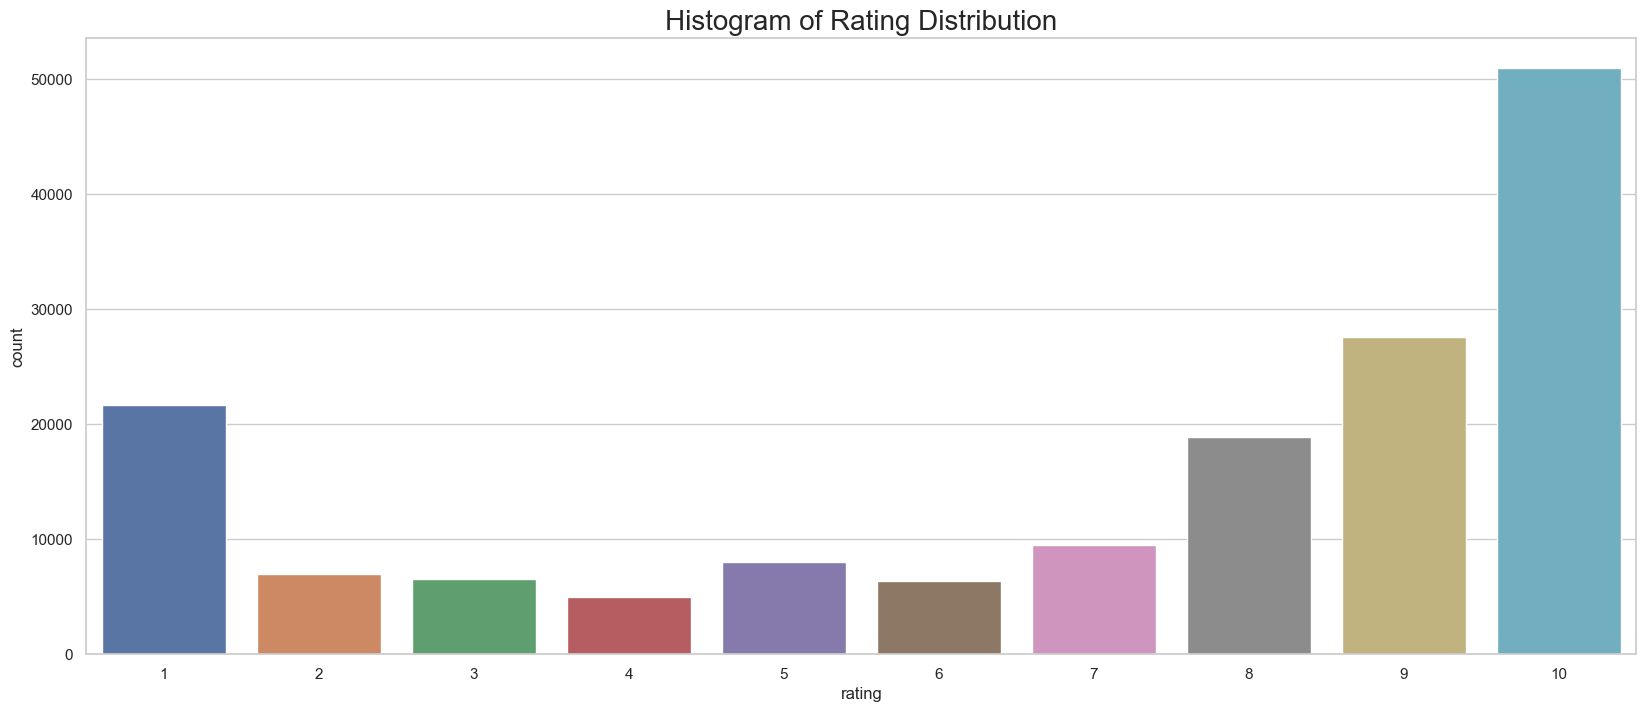

In [16]:
# Bar plot Balance and Purchases
matplotlib.rcParams['figure.figsize'] = (20,8)
sns.set_theme(style="whitegrid")
sns.countplot(x=df["rating"])
plt.title('Histogram of Rating Distribution', fontsize = 20)

**Rating againsts usefulCount**

Customers can also validate other customer's opinion through `usefulCount`. This means that a customer, who reviews and rates a particular product/medicine with a concise opinion, will get supported from other customers as a helpful opinion. From here, other customers who read other customers review can consider more to buy the product/medicine or not.

Text(0.5, 1.0, 'Histogram of Rating againsts usefulCount')

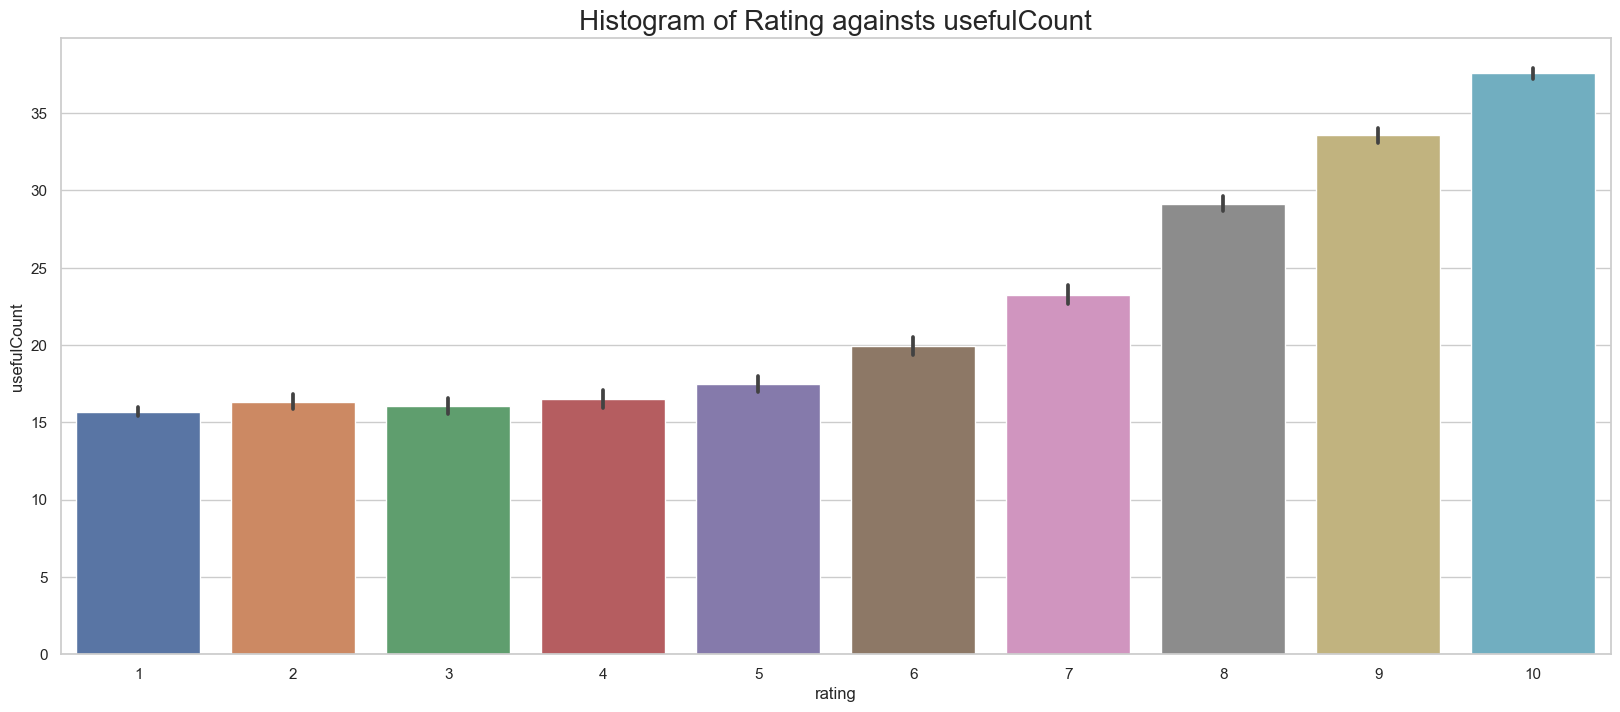

In [17]:
# Bar plot Rating againsts usefulCount
matplotlib.rcParams['figure.figsize'] = (20,8)
sns.set_theme(style="whitegrid")
sns.barplot(x=df["rating"], y=df['usefulCount'])
plt.title('Histogram of Rating againsts usefulCount', fontsize = 20)

**The most and least popular medicines**

As we can observe from the barplots below, both top and bottom 20 the most popular shows strange names such as `3</span>users found this comment helpful` and many others. These are the noise present in the dataset, so we need to deal with these noise later.

Meanwhile for the bottom 20 the least popular medicines per condition have just single counts. These may be the rare condition with particular disease. For the top 20 the most popular condition, we still need to include them as `Not Listed / Others` should be considered as a new disease.


Text(0.5, 1.0, 'Top 20 the most popular medicines per condition')

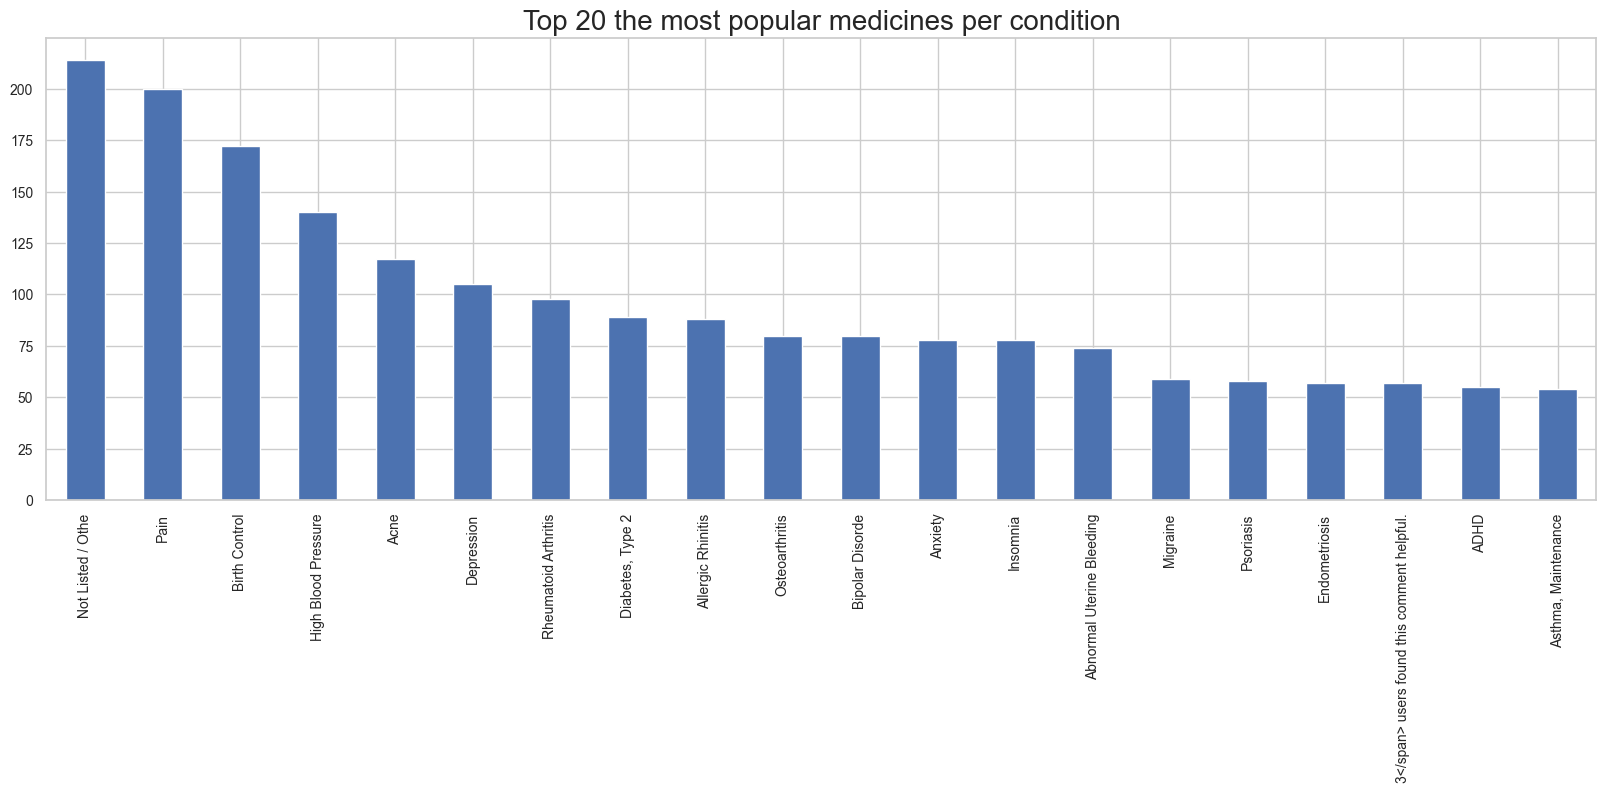

In [18]:
# Finding top 20 the most popular medicines per condition
condition_dn = df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (20,6), fontsize = 10)
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top 20 the most popular medicines per condition", fontsize = 20)

Text(0.5, 1.0, 'Bottom 20 the least popular medicines per condition')

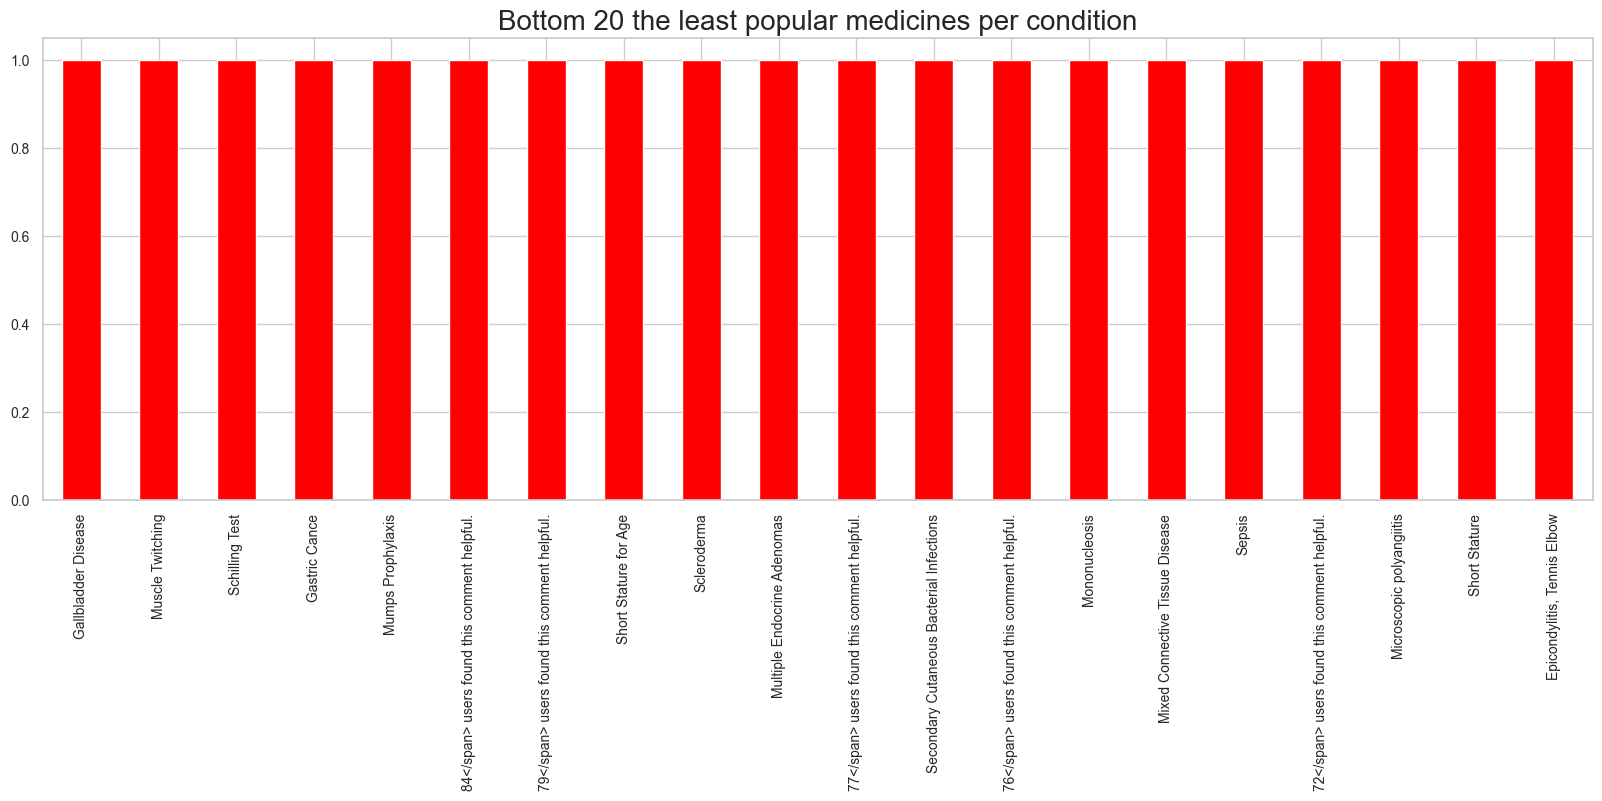

In [19]:
# Finding 20 name of medicines as the least popular per condition
condition_dn[condition_dn.shape[0]-20:condition_dn.shape[0]].plot(kind="bar", figsize = (20,6), fontsize = 10,color="red")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Bottom 20 the least popular medicines per condition", fontsize = 20)

### **4.2. Reviews (Texts)**

Reviews below will be picked randomly to see if the format of text do not have any noises or issues.
- `Review #0` is an example of a short review where there is no grammatical error. This is an example where there should not be many preprocessing before the review is trained in the model.
- `Review #1` is an example where **lowcase** handling should be applied since there is `MUCH` in this review and it will create a new vocabulary while it should be the same meaning with `much`. Moreover, there are some html grammars, such as `\r\n`.
- `Review #10500`: This is an example where customers write a long review with many html grammatical error such as `&#039;` or `&quot;Help&quot;`. This should be corrected later in data preprocessing.

In [20]:
print('Review #0:')
df['review'][0]

Review #0:


'"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"'

In [21]:
print('Review #1:')
df['review'][1]

Review #1:


'"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."'

In [22]:
print('Review #10500:')
df['review'][10500]

Review #10500:


'"This is my experience so far for anyone considering a Mirena coil. \r\nI ummed and erred for months because of negative reviews and my concerns were:\r\n1) Would insertion hurt? The answer was no, I&#039;ve had more painful cervical smears than the insertion of my mirena coil.\r\n2) Would it mess with my monthly cycle? Yes, it did. I bled constantly, (in an array of colours!) for the obligatory 3 months that the GP told me to wait, until my body got used to it. Then it was another month before I finally went back to my GP and said &quot;Help&quot;. She gave me a progesterone pill told me to take it for a month. I only took it for only one week! It did the job, I stopped bleeding and have gone on to a normal cycle. My periods only last a couple of days, do not hurt and are light, (just a smear of blood). I am 47 and compared to the heavy periods I was having before, it&#039;s a walk in the park.\r\n3) Would I put on weight? No, not so far. I feel thinner around the middle.\r\n4) Would

**WordCloud**

Word clouds (also known as tag cloud, word collage or wordle) are visual representation of text that give greater rank to words that appear more frequently. From here, we can see the context of the most commonly mentioned in reviews.

For example, in `the most common words`, there are many things mentioning about the side effect of a medicine. People also talk about how many times they take the medicine as in an oral medicine. Moreover, surprisingly, that customers usually buy the medicine in this store for their sick son.

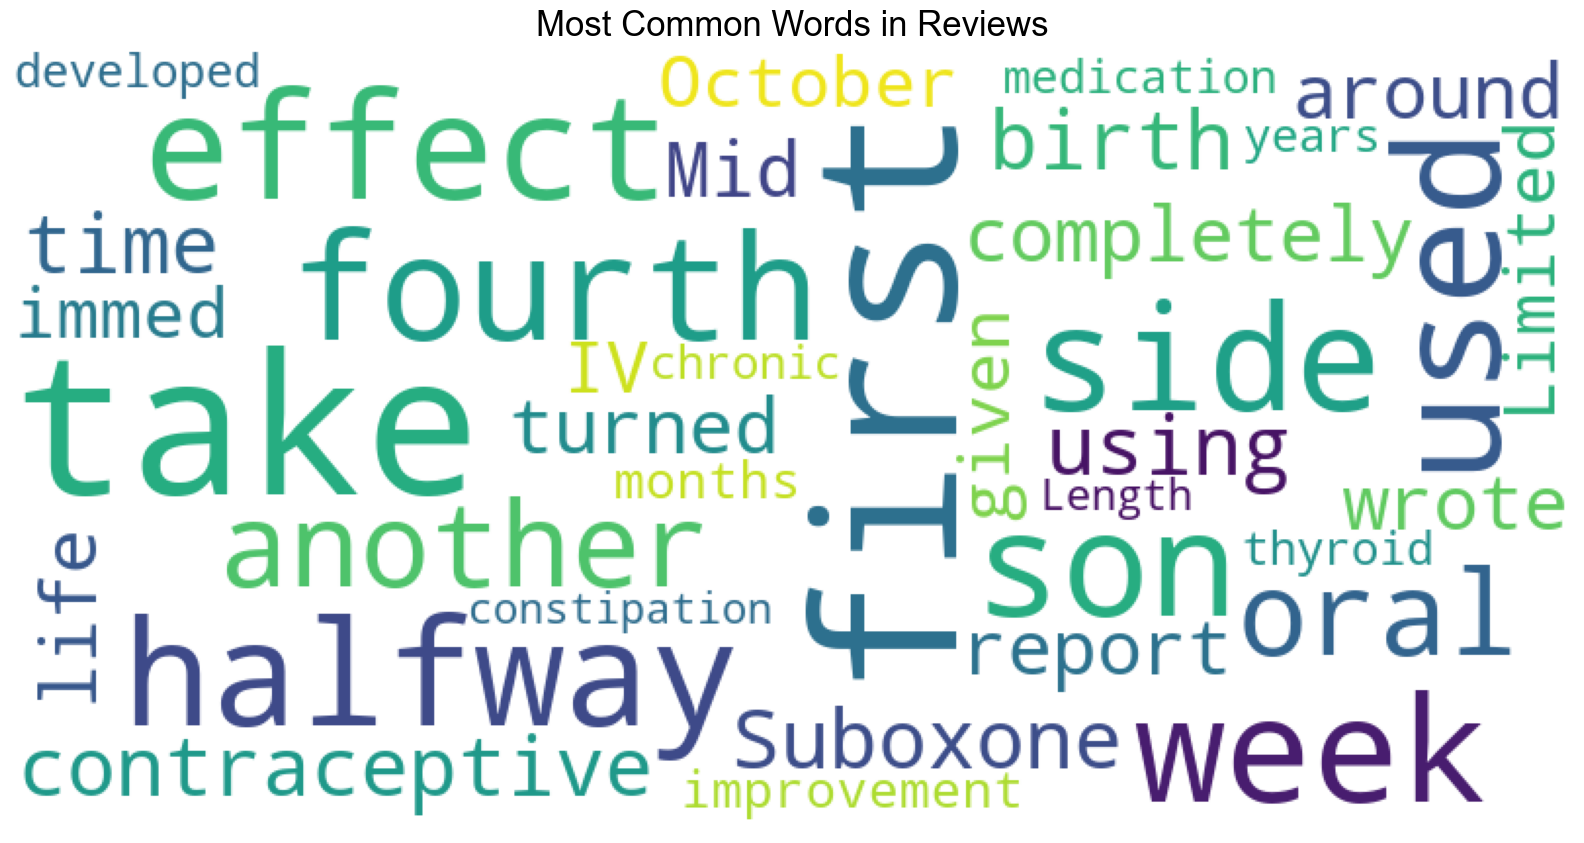

In [23]:
# Word Cloud of Most Common Words in Reviews
# Codes reference, thanks to: https://www.kaggle.com/aashita/word-clouds-of-various-shapes
def plot_wordcloud(text, mask=None, max_words=3000, max_font_size=100, figure_size=(16.0,12.0), 
                   title = None, title_size=25, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown',
                      'wh', 'combinati', 've', 'dtype', 'surgey', 'adu',
                      'Name', 'review','form','object'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords, max_words = max_words, max_font_size = max_font_size, width=800, height=400)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(df["review"], title="Most Common Words in Reviews")

Meanwhile for the most common word in `drugName` is, for example, Guanfacine. Guanfacine is sold as an oral medication used to treat attention deficit hyperactivity disorder and high blood pressure, or usually ADHD. Drugs such as Valsartan is also a medication used to treat high blood pressure, heart failure, and diabetic kidney disease. Another drug name such as Lybrel (or the other name is Levonorgestrel) and Ortho Evra	are medicines for birth control or contraception pills.

Apparently from these common words, we can see that most people will mostly mention about the **hyperactivity disorder**, **high blood pressure**, and **contraception/birth control**.

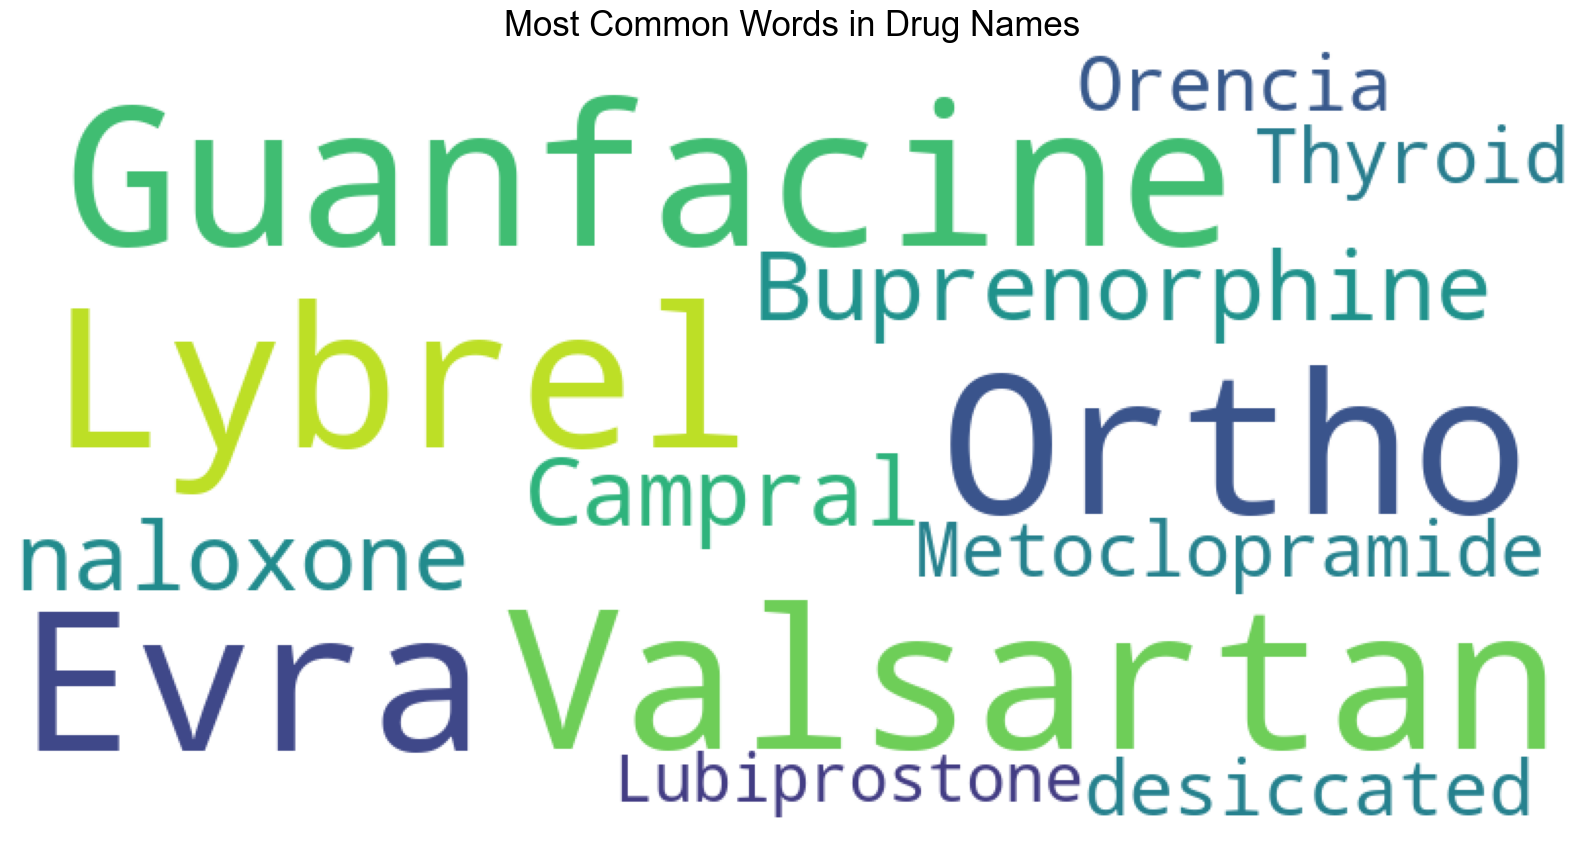

In [24]:
# WordCloud of Drug Names
def plot_wordcloud(text, mask=None, max_words=3000, max_font_size=100, figure_size=(16.0,12.0), 
                   title = None, title_size=25, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'Name', 'object', 'dtype', 'Length', 'drugName'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords, max_words = max_words, max_font_size = max_font_size, width=800, height=400)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(df["drugName"], title="Most Common Words in Drug Names")

## **5. Data Preprocessing**

Data processing will be based on the Exploratory Data Analysis that has been done before. From here, we can conclude that the sentiment analysis should be applied knowing there is a growing tendency of customers for giving more reviews about drugs they buy.

In the data preprocessing, there will be some handling such as:
1. **Dropping Attributes:** to drop some unnecessary attributes that might not be correlated to the review such as `date` and `uniqueID`.
2. **Missing values**: to remove or subtitute some missing value in a row and columns, depends on the percentage of missing value againsts the total number of data.
3. **Error values**: to remove noise from the data, such as meaningless and strange values.
4. **Data inference**: to split the data as the raw one with another data to be trained and tested.
5. **Feature Engineering**: this part is the most important, which is to clean up all the data `reviews` from dirty paragraphs to the cleaner ones. The handling will be exaplained later on.
6. **Converting Target**: to convert target by creating new attribute, called as `sentiment` based on the rating.
7. **N-grams**: is continuous sequences of words or symbols or tokens in a document. This will be used in `Text Vectorization` in the final data preprocessing.
8. **Tokenization**: to split paragraphs and sentences into smaller units that can be more easily assigned meaning. Tokenization will be based on `ngrams`.
9. **Word Embedding**: to represent words for text analysis in the form of real-valued vectors. Embedding will be based on `tokenization` and `feature engineering`.

### **5.1. Dropping Attributes**

In [25]:
# Finding the earliest and latest review submissions
print('The earliest review submission: ', df["date"].min())
print('The latest review submission: ', df["date"].max())

The earliest review submission:  2008-02-24 00:00:00
The latest review submission:  2017-12-12 00:00:00


Apparently `uniqueID` is just reviewers ID when consumers submit the reviews. We can omit this column. Moreover, `date` column will be also omitted, by assuming that timeline might not influence the overall review with the range of year is 10 years. Thus, there are now 5 columns after dropping `uniqueID` and `date`.

In [26]:
# Drop target from features table, and from selection analysis
df = df.drop(['uniqueID', 'date', 'year'],axis=1)
df.head()

,drugName,condition,review,rating,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,37


### **5.2. Missing Values**

Based on the information summary above, we can see apparently `condition` attributes is less than 161,297 data. We should check how many missing values in the corresponding column.

In [27]:
# Detecting and handling Missing Values
print('Total Missing value:','\n',df.isna().sum())
print("Missing value (%):", 1200/df.shape[0] *100)

Total Missing value: 
 drugName         0
condition      899
review           0
rating           0
usefulCount      0
dtype: int64
Missing value (%): 0.7439691996751334


We should take a note that attribute `condition` has **899** missing values. This will be removed from the table because 899 is less than 1% which will not be inpactful for the overall data. We can remove all these missing values from the dataset.

In [28]:
# Dropping one missing value from CREDIT_LIMIT
df.dropna(subset = ['condition'], inplace = True)
df.isna().sum()

drugName       0
condition      0
review         0
rating         0
usefulCount    0
dtype: int64

### **5.3. Error Values**

After checking the columns again, we can see that there is an error values that should not be existed in column `condition` such as:
- `1</span> users found this comment helpful`

We need to clean up this data first as its information is unclear and meaningless.

In [29]:
df[df['condition']=='1</span> users found this comment helpful.']

,drugName,condition,review,rating,usefulCount
678,Alavert D-12 Hour Allergy and Sinus,1</span> users found this comment helpful.,"""I&#039;ve found this product helps to shrink ...",5,1
1882,Depo-Provera,1</span> users found this comment helpful.,"""I got my first (and last) Depo shot about two...",1,1
3716,Aviane,1</span> users found this comment helpful.,"""I just started using Avaine about a 2 weeks a...",7,1
8464,Minastrin 24 Fe,1</span> users found this comment helpful.,"""I started taking birth control when I was 15 ...",8,1
15645,Microgestin Fe 1 / 20,1</span> users found this comment helpful.,"""Very tender but increasingly larger breasts. ...",8,1
...,...,...,...,...,...
153688,TriNessa,1</span> users found this comment helpful.,"""This is the second time i have been on TriNes...",1,1
155704,Cipro,1</span> users found this comment helpful.,"""Weird side effects and didn&#039;t help vagin...",4,1
156736,Sprintec,1</span> users found this comment helpful.,"""I&#039;ve been on Sprintec for almost 2 full ...",8,1
158089,Ocella,1</span> users found this comment helpful.,"""I have been taking Ocella for about 3 years n...",7,1


In [30]:
# delete all rows in 'condition' column that have error values
df_error = df[(df.condition == '1</span> users found this comment helpful.') | (df.condition == '2</span> users found this comment helpful.') |
              (df.condition == '3</span> users found this comment helpful.') | (df.condition == '4</span> users found this comment helpful.') |
              (df.condition == '5</span> users found this comment helpful.') | (df.condition == '6</span> users found this comment helpful.') |
              (df.condition == '7</span> users found this comment helpful.') | (df.condition == '8</span> users found this comment helpful.') |
              (df.condition == '9</span> users found this comment helpful.') | (df.condition == '10</span> users found this comment helpful.') |
              (df.condition == '11</span> users found this comment helpful.') | (df.condition == '12</span> users found this comment helpful.') |
              (df.condition == '13</span> users found this comment helpful.') | (df.condition == '14</span> users found this comment helpful.') |
              (df.condition == '15</span> users found this comment helpful.') | (df.condition == '16</span> users found this comment helpful.') |
              (df.condition == '17</span> users found this comment helpful.') | (df.condition == '18</span> users found this comment helpful.') |
              (df.condition == '19</span> users found this comment helpful.') | (df.condition == '20</span> users found this comment helpful.') |
              (df.condition == '21</span> users found this comment helpful.') | (df.condition == '22</span> users found this comment helpful.') |
              (df.condition == '23</span> users found this comment helpful.') | (df.condition == '24</span> users found this comment helpful.') |
              (df.condition == '25</span> users found this comment helpful.') | (df.condition == '26</span> users found this comment helpful.') |
              (df.condition == '27</span> users found this comment helpful.') | (df.condition == '28</span> users found this comment helpful.') |
              (df.condition == '29</span> users found this comment helpful.') | (df.condition == '30</span> users found this comment helpful.') |
              (df.condition == '31</span> users found this comment helpful.') | (df.condition == '32</span> users found this comment helpful.') |
              (df.condition == '33</span> users found this comment helpful.') | (df.condition == '34</span> users found this comment helpful.') |
              (df.condition == '35</span> users found this comment helpful.') | (df.condition == '36</span> users found this comment helpful.') |
              (df.condition == '37</span> users found this comment helpful.') | (df.condition == '37</span> users found this comment helpful.') |
              (df.condition == '39</span> users found this comment helpful.') | (df.condition == '40</span> users found this comment helpful.') |
              (df.condition == '41</span> users found this comment helpful.') | (df.condition == '42</span> users found this comment helpful.') |
              (df.condition == '43</span> users found this comment helpful.') | (df.condition == '44</span> users found this comment helpful.') |
              (df.condition == '45</span> users found this comment helpful.') | (df.condition == '46</span> users found this comment helpful.') |
              (df.condition == '47</span> users found this comment helpful.') | (df.condition == '48</span> users found this comment helpful.') |
              (df.condition == '49</span> users found this comment helpful.') | (df.condition == '62</span> users found this comment helpful.') |
              (df.condition == '49</span> users found this comment helpful.') | (df.condition == '62</span> users found this comment helpful.') |
              (df.condition == '55</span> users found this comment helpful.') | (df.condition == '63</span> users found this comment helpful.') |
              (df.condition == '61</span> users found this comment helpful.') | (df.condition == '110</span> users found this comment helpful.') |
              (df.condition == '146</span> users found this comment helpful.') | (df.condition == '85</span> users found this comment helpful.') |
              (df.condition == '98</span> users found this comment helpful.') | (df.condition == '84</span> users found this comment helpful.') |
              (df.condition == '72</span> users found this comment helpful.') | (df.condition == '99</span> users found this comment helpful.') |
              (df.condition == '74</span> users found this comment helpful.') | (df.condition == '76</span> users found this comment helpful.') |
              (df.condition == '77</span> users found this comment helpful.') | (df.condition == '121</span> users found this comment helpful.') |
              (df.condition == '95</span> users found this comment helpful.') | (df.condition == '92</span> users found this comment helpful.') |
              (df.condition == '145</span> users found this comment helpful.') | (df.condition == '0</span> users found this comment helpful.') |
              (df.condition == '142</span> users found this comment helpful.') | (df.condition == '94</span> users found this comment helpful.') |
              (df.condition == '75</span> users found this comment helpful.') | (df.condition == '54</span> users found this comment helpful.') |
              (df.condition == '79</span> users found this comment helpful.') | (df.condition == '64</span> users found this comment helpful.') |
              (df.condition == '123</span> users found this comment helpful.') | (df.condition == '51</span> users found this comment helpful.')].index

df = df.drop(df_error)
df.reset_index(drop=True, inplace=True)
df

,drugName,condition,review,rating,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,37
...,...,...,...,...,...
159493,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,125
159494,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,34
159495,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,35
159496,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,79


As we can see after some error values are removed, we can get total number of rows `159,498`, which is `1,799` rows deleted or **1.11%** from the overall data.

### **5.4. Data Inference**

In [31]:
# Creating data inference
df_inf = df.sample(10, random_state=4).sort_index()

# Drop data inference as a new dataframe
df_train_test = df.drop(df_inf.index)

In [32]:
# Reset Index
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf

,drugName,condition,review,rating,usefulCount
0,Antabuse,Alcohol Dependence,"""I took Antabuse for 4 months and it was wonde...",10,120
1,Afrezza,"Diabetes, Type 1","""Not every effective. Too expensive""",1,6
2,Mirena,Birth Control,"""I have been on the mirena for a little over 2...",9,10
3,Guaifenesin,Cough,"""I swear by this stuff. (I&#039;m talking abou...",10,29
4,Dolgic Plus,Headache,"""I used this medicine and it works great but i...",9,0
5,Zyrtec,Allergic Rhinitis,"""As another poster reported, many people who t...",1,62
6,Amoxicillin / clavulanate,Sinusitis,"""I started with infection in my sinus that was...",7,20
7,Dymista,Allergic Rhinitis,"""I&#039;ve had sinusitis for over 12 months wh...",10,10
8,Sulfazine,Rheumatoid Arthritis,"""Nasty stuff. First had extreme tiredness, th...",1,21
9,Grifulvin V,Dermatophytosis,"""It worked great but, a little slower than I w...",8,4


### **5.5. Feature Engineering**

Preprocessing steps that will be done: 

1. **Converting all texts to lowercase**: This part is to lowercase all captical characters that are available in review attributes. If this is not applied, there will be two different words registered in the dictionary later in the model. As we can take an example from `Review #1`, "MUCH" and "much" are actually the same meaning but they will be categorized as different meaning. So, it is better to choose either to uppercase or lowercase all characters. But in this case, we will lowercase all of them instead.
2. **Deleting Whitespace**: these erroneous whitespaces as this is a problem resulting the context of words will be changed. For example, there is a whilespace in `eff ect` while we want `effect` as the word. Then, deleting whitespace in such example should be applied.
3. **Converting and removing html grammar**: As already mentioned before, there are some strange value such as `\r\n4` and many others, this will be the converted. Meanwhile, the removal will be done by making letters only.
4. **Making letters only**: This will make the reviews as letters only, although. Symbols, punctuation, and number will be removed as well.
5. **Removing link**: Although this part has not been checked yet, we assume that any link will be the noise that should be removed regardless it is available or not.
6. **Tokenizing words**: We will tokenize the words. We will split the sentences with spaces e.g "I might come" to be "I", "might", "come"
7. **Removing stopwords**: words that are so common they are basically ignored by typical tokenizers. By default, NLTK (Natural Language Toolkit) includes a list of 40 stop words, including: “a”, “an”, “the”, “of”, “in”, etc. The stopwords in nltk are the most common words in data.
8. **Lemmatization**: to convert word to its root form.It is a step by step procedure of obtaining the root form of the word, it makes use of vocabulary (dictionary importance of words) and morphological analysis (word structure and grammar relations. For example, `cacti` will be converted to `cactus` as the basic word.

**All documents**

In [33]:
# Creating Function for preprocessing and make it into a DataFrame
def text_process(text):
  # Converting all texts to lowercase
  text = text.lower()

  # Removing Whitespace
  text = text.strip()

  # Deleting HTML
  text = BeautifulSoup(text, 'html.parser').get_text()

  # Removing punctuation
  text = text.translate(str.maketrans('', '', string.punctuation))

  # Removing Link
  text = re.sub(r"http\S+", ' ', text)
  text = re.sub(r"www.\S+", ' ', text)

  # Tokenizing words
  tokens = word_tokenize(text)

  # Removing Stopwords
  stpwds_en = list(set(stopwords.words('english')))
  stpwds_en.append('ve')

  text = ' '.join([word for word in tokens if word not in stpwds_en])
  
  # Stemming
  stemmer = SnowballStemmer('english')
  text = stemmer.stem(text)
  
  # Lemmatizer
  # lemmatizer = WordNetLemmatizer()
  # text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
  
  return text

In [34]:
# Applying all preprocessing in one document
df_train_test['text_processed'] = df_train_test['review'].apply(lambda x: text_process(x))
df_train_test.head()

,drugName,condition,review,rating,usefulCount,text_processed
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,27,side effect take combination bystolic 5 mg fis...
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,192,son halfway fourth week intuniv became concern...
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,17,used take another oral contraceptive 21 pill c...
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,10,first time using form birth control im glad we...
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,37,suboxone completely turned life around feel he...


Below is the example of `Review #1` that has been processed from the feature engineering.

In [35]:
# Rechecking if review #1 example is already cleaned
df_train_test.text_processed[1]

'son halfway fourth week intuniv became concerned began last week started taking highest dose two days could hardly get bed cranky slept nearly 8 hours drive home school vacation unusual called doctor monday morning said stick days see school getting morning last two days problem free much agreeable ever less emotional good thing less cranky remembering things overall behavior better tried many different medications far effect'

### **5.6. Converting Target**

Target will be a binary attribute, called as `sentiment`.
- Rating 1-5 is categorized as `negative sentiment`
- Rating 6-10 is categorized as `positive sentiment`

In [36]:
# Making a rating with sentiment
df_train_test['sentiment'] = df_train_test["rating"].apply(lambda x: 1 if x > 5 else 0)
df_train_test

,drugName,condition,review,rating,usefulCount,text_processed,sentiment
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,27,side effect take combination bystolic 5 mg fis...,1
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,192,son halfway fourth week intuniv became concern...,1
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,17,used take another oral contraceptive 21 pill c...,0
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,10,first time using form birth control im glad we...,1
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,37,suboxone completely turned life around feel he...,1
...,...,...,...,...,...,...,...
159483,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,125,wrote first report midoctober 2014 alcohol sin...,1
159484,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,34,given iv surgey immediately became anxious cou...,0
159485,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,35,limited improvement 4 months developed bad ras...,0
159486,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,79,ive thyroid medication 49 years spent first 38...,1


In [37]:
# Showing the sentiment distribution
df_train_test['sentiment'].value_counts()

1    111996
0     47492
Name: sentiment, dtype: int64

Labelling the target will be used for creating N-grams. From here, we will compare N-grams (from unigrams to 4-grams) and see if there is any difference of commonly mentioned words between positive and negative sentiment.

In [38]:
# Labelling Target
df_positive = df_train_test[df_train_test["rating"]>5]
df_negative = df_train_test[df_train_test["rating"]<6]

df_positive.head()

,drugName,condition,review,rating,usefulCount,text_processed,sentiment
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,27,side effect take combination bystolic 5 mg fis...,1
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,192,son halfway fourth week intuniv became concern...,1
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,10,first time using form birth control im glad we...,1
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,37,suboxone completely turned life around feel he...,1
7,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,32,abilify changed life hope zoloft clonidine fir...,1


In [39]:
df_negative.head()

,drugName,condition,review,rating,usefulCount,text_processed,sentiment
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,17,used take another oral contraceptive 21 pill c...,0
5,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,43,2nd day 5mg started work rock hard erections h...,0
6,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,5,pulled cummed bit took plan b 26 hours later t...,0
8,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,11,nothing problems keppera constant shaking arms...,0
12,Pentasa,Crohn's Disease,"""I had Crohn&#039;s with a resection 30 years ...",4,8,crohns resection 30 years ago mostly remission...,0


### **5.7. N-grams**

N-grams are continuous sequences of words or symbols or tokens in a document. In technical terms, they can be defined as the neighbouring sequences of items in a document. This will be useful for tokenizing after analyzing n-grams, so basically n-grams create `chunks` of words which will show more meaningful and contextual words.

For example, if a unigram (n=1) shows `post`, this context is still wide. Meanwhile, with 4-grams (n=4) shows `post traumatic stress disorder`, this will be more meaningful and spesific.

- Codes reference, thanks to: https://www.analyticsvidhya.com/blog/2021/09/what-are-n-grams-and-how-to-implement-them-in-python/

In [40]:
## custom function for n-gram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

#### **5.7.1. Unigram**

In [41]:
## Get the bar chart from rating  6 to 10 review ##
freq_dict = defaultdict(int)
for sent in df_negative["review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1

## Get the bar chart from rating  1 to 5 review ##
freq_dict = defaultdict(int)
for sent in df_positive["review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1

fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]

trace0 = horizontal_bar_chart(fd_sorted.head(30), 'blue')
trace1 = horizontal_bar_chart(fd_sorted.head(30), 'blue')

# Creating two subplots
fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                             subplot_titles=["Frequent words of rating 1 to 5", 
                                             "Frequent words of rating 6 to 10"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=900, width=1400, title="Unigram: Word Count Plots after Preprocessing Documents")
fig.show()

<img src="unigram.png">

#### **5.7.2. Bigrams**

In [42]:
## Get the bar chart from rating  6 to 10 review ##
freq_dict = defaultdict(int)
for sent in df_negative["review"]:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1

## Get the bar chart from rating  1 to 5 review ##
freq_dict = defaultdict(int)
for sent in df_positive["review"]:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1

fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]

trace0 = horizontal_bar_chart(fd_sorted.head(30), 'red')
trace1 = horizontal_bar_chart(fd_sorted.head(30), 'red')

# Creating two subplots
fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                             subplot_titles=["Frequent words of rating 1 to 5", 
                                             "Frequent words of rating 6 to 10"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=900, width=1400, title="Bigrams: Word Count Plots after Preprocessing Documents")
fig.show()

<img src="bigram.png">

#### **5.7.3. Trigrams**

In [43]:
## Get the bar chart from rating  6 to 10 review ##
freq_dict = defaultdict(int)
for sent in df_negative["review"]:
    for word in generate_ngrams(sent, 3):
        freq_dict[word] += 1

## Get the bar chart from rating  1 to 5 review ##
freq_dict = defaultdict(int)
for sent in df_positive["review"]:
    for word in generate_ngrams(sent, 3):
        freq_dict[word] += 1

fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]

trace0 = horizontal_bar_chart(fd_sorted.head(30), 'purple')
trace1 = horizontal_bar_chart(fd_sorted.head(30), 'purple')

# Creating two subplots
fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                             subplot_titles=["Frequent words of rating 1 to 5", 
                                             "Frequent words of rating 6 to 10"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=900, width=1400, title="Trigrams: Word Count Plots after Preprocessing Documents")
fig.show()

<img src="trigram.png">

#### **5.7.4. 4-grams**

In [44]:
## Get the bar chart from rating  6 to 10 review ##
freq_dict = defaultdict(int)
for sent in df_negative["review"]:
    for word in generate_ngrams(sent, 4):
        freq_dict[word] += 1

## Get the bar chart from rating  1 to 5 review ##
freq_dict = defaultdict(int)
for sent in df_positive["review"]:
    for word in generate_ngrams(sent, 4):
        freq_dict[word] += 1

fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]

trace0 = horizontal_bar_chart(fd_sorted.head(30), 'orange')
trace1 = horizontal_bar_chart(fd_sorted.head(30), 'orange')

# Creating two subplots
fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                             subplot_titles=["Frequent words of rating 1 to 5", 
                                             "Frequent words of rating 6 to 10"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=900, width=1600, title="4-grams: Word Count Plots after Preprocessing Documents")
fig.show()

<img src="4grams.png">

### **5.8. Tokenization**

Tokenizaation is an important step in many NLP applications, as it allows for further analysis of the individual tokens, such as part-of-speech tagging, named entity recognition, and sentiment analysis. It also helps with text normalization and cleaning, by removing unwanted characters and formatting from the text. For example, the sentence "The quick brown fox jumped over the lazy dog" could be tokenized into the following tokens: "The", "quick", "brown", "fox", "jumped", "over", "the", "lazy", "dog". However, in this tokenization, we will **use 4-grams** as the chunk of the split.

- First step that will be applied is to split the data into train and test set.
- After that, vectorize both train and test set using `CountVectorizer` which is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.
- Find the number of vocabularies and length of token in one document. The **number of vocabularies**, **length of token**, and **4-grams** are used for `Text Vectorization`.

In [45]:
# Splitting Train and Test set
X_train, X_test, y_train, y_test = train_test_split(df_train_test.text_processed, 
                                                    df_train_test.sentiment, 
                                                    test_size=0.25, 
                                                    random_state=23, 
                                                    stratify=df_train_test.sentiment)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (119616,)
Test Size  :  (39872,)


In [46]:
# Get Vocabularies
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<119616x68644 sparse matrix of type '<class 'numpy.int64'>'
	with 4487518 stored elements in Compressed Sparse Row format>

In [47]:
# Finding number of vocabularies and length of token in one document
sum_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print("Number of Vocabularies : ", sum_vocab)
print("Maximum words in a sentence (length) : ", max_sen_len, "words")

Number of Vocabularies :  68644
Maximum words in a sentence (length) :  953 words


In [48]:
# Text Vectorization
text_vectorization = TextVectorization(max_tokens = sum_vocab,
                                       standardize = "lower_and_strip_punctuation",
                                       split = "whitespace",
                                       ngrams = 4,
                                       output_mode = "int",
                                       output_sequence_length = max_sen_len,
                                       input_shape=(1,)
                                       )

text_vectorization.adapt(X_train)

In [50]:
# Document Example
print('Document Example')
print(df_train_test.text_processed[1])
print('')

# Text Vectorization Results
print('Text Vectorization Results')
print(text_vectorization([df_train_test.text_processed[1]]))
print('Vector Size : ', text_vectorization([df_train_test.text_processed[1]]).shape)

Document Example
son halfway fourth week intuniv became concerned began last week started taking highest dose two days could hardly get bed cranky slept nearly 8 hours drive home school vacation unusual called doctor monday morning said stick days see school getting morning last two days problem free much agreeable ever less emotional good thing less cranky remembering things overall behavior better tried many different medications far effect

Text Vectorization Results
tf.Tensor(
[[  574  5686  1821    27  5616   310  1387   278    70    27    11     5
   3202    76    47    16    84   927    13   247  6176   749   572   198
     72   213   425   428  4294  2866   579    31  1638   129   168   725
     16   133   428    86   129    70    47    16   194   331    42     1
     97   164   473    54   134   164  6176  2904   184   304  2427    53
     63   136   165   335    92    87     1     1 11180     1     1     1
      1     1  1117  2612   193     1 10875 11364   580  7416  4588 19

### **5.9. Word Embedding**

Here are a few examples of vectorization in natural language processing:
- One-hot encoding: This is a simple form of vectorization that involves representing each word in a text as a binary vector.
- Word embeddings: Word embeddings are a more sophisticated form of vectorization that involves representing each word as a dense vector of real numbers.
- Document embeddings: In addition to representing individual words as vectors, it is also possible to represent entire documents (e.g. sentences, paragraphs, or entire documents) as vectors.

Since the reviews are more in paragraphs, then the vectorization will be done with **Word Embedding**, by inputing numbers of vocabularies and maximum words in a sentence.

In [51]:
# Embedding
embedding = Embedding(input_dim=sum_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

In [52]:
# Embedding Results
print('Embedding Results')
print(embedding(text_vectorization([df_train_test.text_processed[1]])))
print('Vector Size : ', embedding(text_vectorization([df_train_test.text_processed[1]])).shape)

Embedding Results
tf.Tensor(
[[[-0.01375176 -0.04145539  0.03447858 ... -0.0408235  -0.04004785
    0.02185546]
  [ 0.0164117  -0.03818607 -0.04883743 ... -0.0103454   0.00387062
    0.04426565]
  [ 0.02692927 -0.02531766  0.0211898  ...  0.02413866 -0.02689607
   -0.03809886]
  ...
  [ 0.03757601  0.00172959 -0.0191322  ...  0.04083839  0.04638261
    0.01889589]
  [ 0.03757601  0.00172959 -0.0191322  ...  0.04083839  0.04638261
    0.01889589]
  [ 0.03757601  0.00172959 -0.0191322  ...  0.04083839  0.04638261
    0.01889589]]], shape=(1, 953, 128), dtype=float32)
Vector Size :  (1, 953, 128)


## **6. Model Definition**

Models in **sentiment analysis** can be done with Deep Neural Network (DNN) such as `Sequential API` and `Functional API`. Another methodologies such as LSTM, GRU, and BERT also can be applied as well.

### **6.1. Target Encoding**

Terget Encoding is to check whether the target is in binary or not. These `y_train` and `y_test` will be used later in model training.

In [53]:
# Checking target y_train
y_train.sort_index()

1         1
4         1
6         0
7         1
8         0
         ..
159483    1
159484    0
159485    0
159486    1
159487    1
Name: sentiment, Length: 119616, dtype: int64

In [54]:
# Checking target y_test
y_test.sort_index()

0         1
2         0
3         1
5         0
12        0
         ..
159449    0
159450    1
159470    1
159479    1
159482    1
Name: sentiment, Length: 39872, dtype: int64

### **6.2. Metrics, Loss, and Optimizer**

**Metrics**:
The metrics that will be used are between 4 metrics. We can define those F1-score, Accuracy, Precision, and Recall as below:

- **Accuracy** measures the fraction of the total sample that is correctly identified
- **Precision** measures that out of all the examples predicted as positive, how many are actually positive
- **Recall** measures that out of all the actual positives, how many examples were correctly classified as positive by the model
- **F1 Score** is the harmonic mean of the Precision and Recall

The leaderboard is based on Mean F-Score which can be implemented with **Macro Average F1 Score**. Another crucial point is Precision, Recall and F1-Score are global metrics so they should be calculated on whole training or validation set. Computing them on every batch would be both misleading and ineffective in terms of execution time. By using `classification report` computes those metrics after every epoch for the given training and validation set.

However, in tensorflow, apparently it does not have scoring besides `accuracy`. Then, we will install **Tensorflow Addons** as `tfa` to calculate F1-Score with its parameters.

```
metrics= tfa.metrics.F1Score(
  num_classes=1, average='macro',
  threshold=0.75)
```

**Loss**:
We will use `binary_crossentropy` class. Since we have a binary target, then `binary_crossentropy` is used to compute the cross-entropy loss between true labels and predicted labels.

**Optimizer**:
Optimizer in NLP helps a model improve its performance by adjusting the model's parameters to find the optimal configuration. The goal of an optimizer is to minimize the error between the model's predictions and the true values in the training data. There are many different types of optimizers, each with its own strengths and weaknesses, and choosing the right optimizer for a given NLP task can have a significant impact on the model's performance especially to control the exploding gradient.

In this analysis, the choosen optimizer is either Adam and Adamax as it is commonly used. Adam is an adaptive learning rate optimization algorithm that's been designed to work well with deep neural networks. Adamax, on the other hand, is a variant of Adam that's based on the infinity norm, which is a measure of the size of a vector. However, after the comparing both optimizer, then **Adamax** is chosen as the model is improved much better.

### **6.3. Sequential API Model Definition**

In the model, we include number of vocabularies, word embedding, and global average pooling.

**GlobalAveragePooling1D** can help simplify the input data and make the model more efficient, without losing too much important information. This vector would then be fed into the output layer, where it would be used to predict the sentiment of the sentence.

After for training for many times, apparently the best result of the model is by using one hidden layer instead of many layers. It is not necessarily bad to not use hidden layers in natural language processing (NLP) models, but it may limit the model's ability to learn complex patterns in the data.



In [76]:
# Define model using DNN Sequential API
model = tf.keras.Sequential()

model.add(text_vectorization)
model.add(embedding)
model.add(GlobalAveragePooling1D())

# Input layer
model.add(tf.keras.layers.Dense(800, activation='relu', input_shape=(20000,),
                                kernel_initializer='glorot_normal',
                                kernel_regularizer='l2')) # relu better than sigmoid, to present vanishing gradient problem
model.add(tf.keras.layers.BatchNormalization())  # improve  stability of the network
model.add(tf.keras.layers.Dropout(0.8)) # prevents overfitting

# Hidden layers (apparently less overfit if not using hiddel layers)
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_regularizer='l2')) # hidden layer 1
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.8)) # prevents overfitting

# Output Layer
model.add(tf.keras.layers.Dense(1, activation='relu', name='output')) 

# Set optimizer
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.Adamax(clipvalue=1.0), #(clipvalue=1.0, lr=0.01, momentum=0.9) just in case
              metrics= [
                  tfa.metrics.F1Score(
                      num_classes=1,
                      average='macro',
                      threshold=0.75)
                      ]
              )

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 953)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 953, 128)          8786432   
                                                                 
 global_average_pooling1d_2   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_3 (Dense)             (None, 800)               103200    
                                                                 
 batch_normalization_3 (Batc  (None, 800)              3200      
 hNormalization)                                                 
                                                      

## **7. Model Training**

For model training, there are many processes that have been done especially for changing epochs, batch_size, and validation_split. We finally get the best result where:
```
Training model parameters:
  batch_size = 128,
  epochs=7,
  shuffle=True,
  validation_split=0.15,
```

In [60]:
# Train the sequential improved
%time
print("Training the model ...")
history = model.fit(X_train, y_train,
                    batch_size = 128,
                    epochs=7,
                    shuffle=True,
                    validation_split=0.15,
                    validation_data=(X_test,y_test))

CPU times: total: 0 ns
Wall time: 0 ns
Training the model ...
Epoch 1/7
935/935 [==============================] - 184s 195ms/step - loss: 1.5202 - f1_score: 0.3607 - val_loss: 1.1298 - val_f1_score: 0.2413
Epoch 2/7
935/935 [==============================] - 187s 200ms/step - loss: 0.9156 - f1_score: 0.7222 - val_loss: 0.7653 - val_f1_score: 0.7785
Epoch 3/7
935/935 [==============================] - 189s 202ms/step - loss: 0.6700 - f1_score: 0.8030 - val_loss: 0.6282 - val_f1_score: 0.7176
Epoch 4/7
935/935 [==============================] - 186s 199ms/step - loss: 0.5348 - f1_score: 0.8294 - val_loss: 0.5866 - val_f1_score: 0.8764
Epoch 5/7
935/935 [==============================] - 184s 197ms/step - loss: 0.4584 - f1_score: 0.8431 - val_loss: 0.5181 - val_f1_score: 0.8306
Epoch 6/7
935/935 [==============================] - 184s 197ms/step - loss: 0.4163 - f1_score: 0.8582 - val_loss: 0.5422 - val_f1_score: 0.8808
Epoch 7/7
935/935 [==============================] - 183s 196ms/step

## **8. Model Evaluation**

The table below shows the summary of the training model. This table will be plotted as line plots, such as `Macro Average of F1-Score` and `Loss`.

In [61]:
# Create DataFrame
df_history = pd.DataFrame(history.history)
df_history

,loss,f1_score,val_loss,val_f1_score
0,1.520223,0.360730,1.129821,0.241339
1,0.915615,0.722179,0.765320,0.778521
2,0.670008,0.803012,0.628189,0.717617
3,0.534819,0.829428,0.586553,0.876437
4,0.458431,0.843145,0.518112,0.830630
5,0.416271,0.858155,0.542211,0.880837
6,0.387522,0.870988,0.662691,0.901583


**Macro Average of F1-Score**

The plot below shows that the model is working with the dataset. Moreover, the result can be concluded as a good-fit since the macro average of F1-Score is around 80%.

<AxesSubplot: >

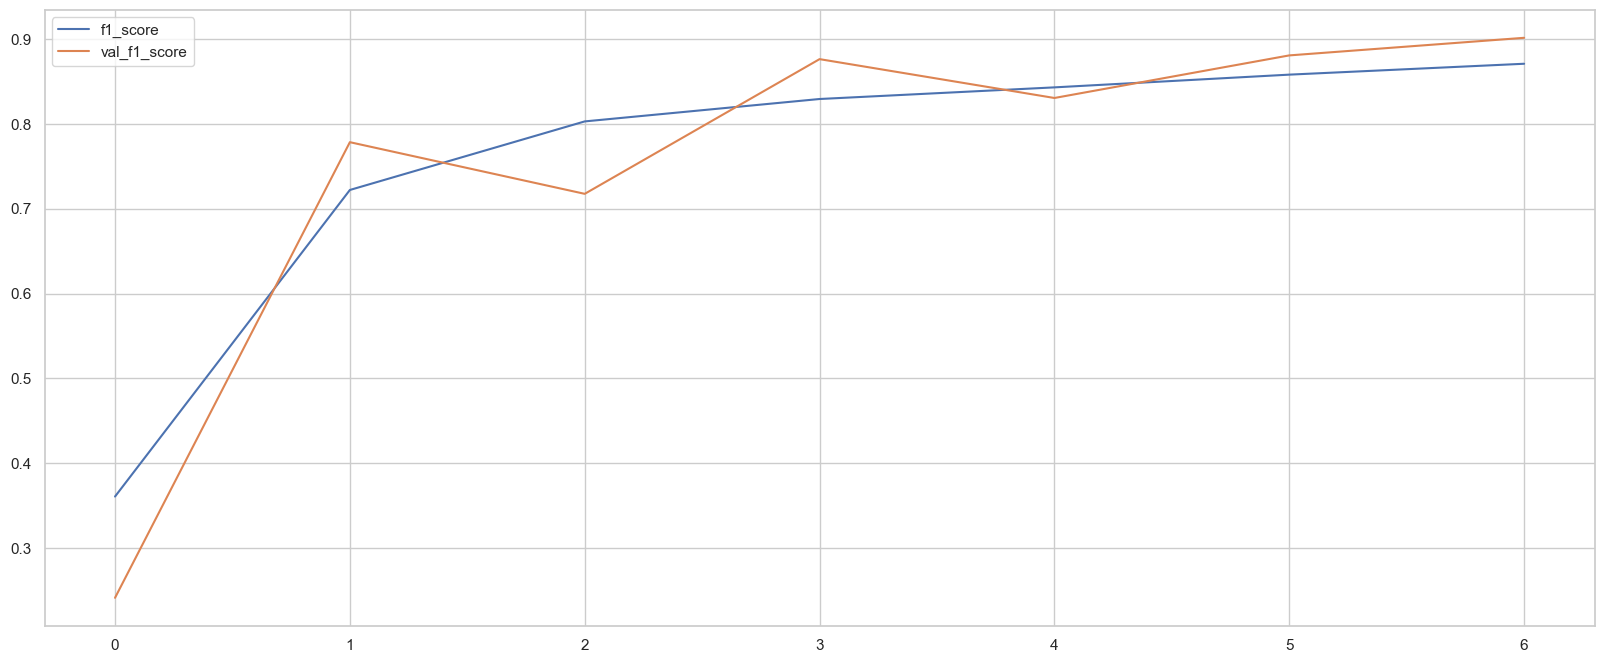

In [62]:
# Plot between accuracy and val_accuracy
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,8)

df_history[['f1_score', 'val_f1_score']].plot()

**Loss**

<AxesSubplot: >

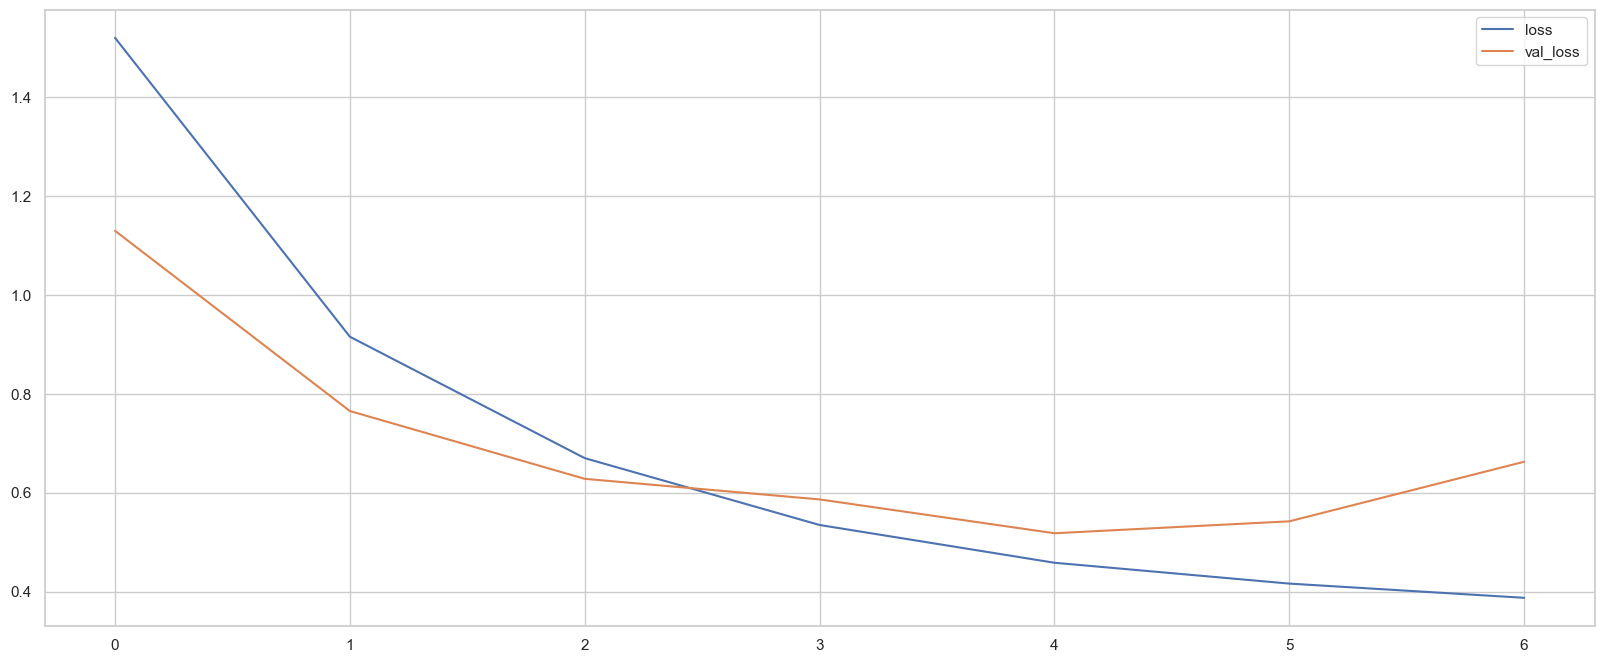

In [63]:
# Plot between loss and val_loss
df_history[['loss', 'val_loss']].plot()

**Classification Report**

In [64]:
# Classification Report
y_pred_train_seq = model.predict(X_train)
y_pred_test_seq = model.predict(X_test)

y_pred_train_seq = np.where(y_pred_train_seq >=0.5, 1, 0)
y_pred_test_seq = np.where(y_pred_test_seq >=0.5, 1, 0)
print('\n')

print('Train set Classification Report')
print(classification_report(y_train, y_pred_train_seq))

print('Test set Classification Report')
print(classification_report(y_test, y_pred_test_seq))

# Model Evaluation
print('F1-Score')
print('Train Set  : ', f1_score(y_train, y_pred_train_seq))
print('Test Set  : ', f1_score(y_test, y_pred_test_seq))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1246/1246 [==============================] - 16s 13ms/step


Train set Classification Report
              precision    recall  f1-score   support

           0       0.95      0.52      0.67     35619
           1       0.83      0.99      0.90     83997

    accuracy                           0.85    119616
   

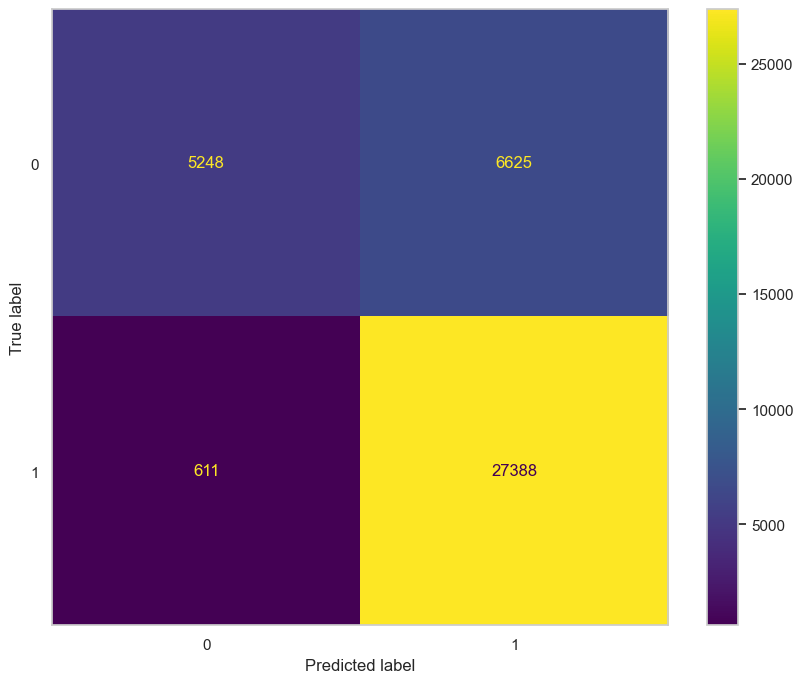

In [65]:
# Creating confusion matrix for train set (default parameter)
cm = confusion_matrix(y_test, y_pred_test_seq)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

matplotlib.rcParams['figure.figsize'] = (10,8)
disp.plot()
plt.grid(b=None)
plt.show()

Based on Classification Report and Confusion Matrix, we can see that most of reviews are classified as `positive sentiment` with number of customers `27,388`, and `negative sentiment` are `5,248` indicated by precited-true label (0,0). However, there is some error such as the high number of **False Positive** with number of customers `6,625`.

A false positive in a classification model occurs when the model predicts that an example belongs to a certain class, but it actually does not belong to that class. For example, in this sentiment classification, a false positive would be when classification incorrectly predicts that a customer gives a positive review, when in fact they do not give positive review at all. This can be a problem because it can lead to false sentiment, which can be potentially harmful to the customers and even patient. False positives are typically more common in tests that have a high sensitivity, meaning that they are able to detect a large number of true positives, but at the cost of also having a higher rate of false positives.

## **9. Model Saving**

In [77]:
# Summary of Model Sequential
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 953)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 953, 128)          8786432   
                                                                 
 global_average_pooling1d_2   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_3 (Dense)             (None, 800)               103200    
                                                                 
 batch_normalization_3 (Batc  (None, 800)              3200      
 hNormalization)                                                 
                                                      

In [78]:
# Freeze Model
model.trainable = False
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 953)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 953, 128)          8786432   
                                                                 
 global_average_pooling1d_2   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_3 (Dense)             (None, 800)               103200    
                                                                 
 batch_normalization_3 (Batc  (None, 800)              3200      
 hNormalization)                                                 
                                                      

In [80]:
# Calling `save('model_nlp')` creates a SavedModel folder `model_nlp`.
model.save('model_nlp')

Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x00000299EF7CE0D0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x00000299EF7CE0D0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x00000299EF7CE0D0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Assets written to: model_nlp\assets


INFO:tensorflow:Assets written to: model_nlp\assets


In [69]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("model_nlp")

In [ ]:
!zip -r ./model_nlp.zip ./model_nlp/

updating: model_nlp/ (stored 0%)
updating: model_nlp/assets/ (stored 0%)
updating: model_nlp/keras_metadata.pb (deflated 89%)
updating: model_nlp/variables/ (stored 0%)
updating: model_nlp/variables/variables.index (deflated 65%)
updating: model_nlp/variables/variables.data-00000-of-00001 (deflated 8%)
updating: model_nlp/saved_model.pb (deflated 72%)


## **10. Model Inference**

In [70]:
df_inf

,drugName,condition,review,rating,usefulCount
0,Antabuse,Alcohol Dependence,"""I took Antabuse for 4 months and it was wonde...",10,120
1,Afrezza,"Diabetes, Type 1","""Not every effective. Too expensive""",1,6
2,Mirena,Birth Control,"""I have been on the mirena for a little over 2...",9,10
3,Guaifenesin,Cough,"""I swear by this stuff. (I&#039;m talking abou...",10,29
4,Dolgic Plus,Headache,"""I used this medicine and it works great but i...",9,0
5,Zyrtec,Allergic Rhinitis,"""As another poster reported, many people who t...",1,62
6,Amoxicillin / clavulanate,Sinusitis,"""I started with infection in my sinus that was...",7,20
7,Dymista,Allergic Rhinitis,"""I&#039;ve had sinusitis for over 12 months wh...",10,10
8,Sulfazine,Rheumatoid Arthritis,"""Nasty stuff. First had extreme tiredness, th...",1,21
9,Grifulvin V,Dermatophytosis,"""It worked great but, a little slower than I w...",8,4


In [71]:
# Applying all preprocessing in one document
df_inf['text_processed'] = df_inf['review'].apply(lambda x: text_process(x))

# Making a rating with sentiment
df_inf['sentiment'] = df_inf["rating"].apply(lambda x: 1 if x > 5 else 0)
df_inf

,drugName,condition,review,rating,usefulCount,text_processed,sentiment
0,Antabuse,Alcohol Dependence,"""I took Antabuse for 4 months and it was wonde...",10,120,took antabuse 4 months wonderful since remove ...,1
1,Afrezza,"Diabetes, Type 1","""Not every effective. Too expensive""",1,6,every effective expens,0
2,Mirena,Birth Control,"""I have been on the mirena for a little over 2...",9,10,mirena little 2 years experienced lot irregula...,1
3,Guaifenesin,Cough,"""I swear by this stuff. (I&#039;m talking abou...",10,29,swear stuff im talking musinexs version theraf...,1
4,Dolgic Plus,Headache,"""I used this medicine and it works great but i...",9,0,used medicine works great initially causes nau...,1
5,Zyrtec,Allergic Rhinitis,"""As another poster reported, many people who t...",1,62,another poster reported many people try quit t...,0
6,Amoxicillin / clavulanate,Sinusitis,"""I started with infection in my sinus that was...",7,20,started infection sinus mild got bad nosebleed...,1
7,Dymista,Allergic Rhinitis,"""I&#039;ve had sinusitis for over 12 months wh...",10,10,ive sinusitis 12 months resulted nasal polyps ...,1
8,Sulfazine,Rheumatoid Arthritis,"""Nasty stuff. First had extreme tiredness, th...",1,21,nasty stuff first extreme tiredness stomach pa...,0
9,Grifulvin V,Dermatophytosis,"""It worked great but, a little slower than I w...",8,4,worked great little slower w,1


In [72]:
# Transform Inference-Set 
df_inf_transform = df_inf.text_processed

In [73]:
# Predict using Neural Network
y_pred_inf = reconstructed_model.predict(df_inf_transform)
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)
y_pred_inf

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 264ms/step


array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1]])

In [74]:
# Creating dataframe prediction
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Prediction'],index=df_inf.index)

# Comparing the real target and prediction
model_inf = pd.concat([df_inf['sentiment'], y_pred_inf['Prediction']], axis=1).sort_index()
model_inf

,sentiment,Prediction
0,1,1
1,0,1
2,1,1
3,1,1
4,1,1
5,0,0
6,1,1
7,1,1
8,0,0
9,1,1


## **11. Conclusion**

**1. Evaluating from model for main question**

The model is apparently working with the data we have here. It can be observed by the classification report that both train and test set have `Mean F1-Score` is 0.90 for train set, and 0.88 for test set. These results can be included as `good-fit`.



**2. Evaluating from Prediction Inference**

As we can see the result of prediction from the model shows that the error prediction happens at index #1, where the actual sentiment is `0` or `negative sentiment` but the prediction shows a different result, which is `1` or `positive sentiment`.

So, we should review why the difference happens in this prediction.
- Actual review says: "*Not every effective. Too expensive*"
- Text processed from that review says: "*every effective expens*"

Apparently the model is wrong to predict because of the different sentiment between the actual review and text processed. The actual review indeed has a negative sentiment or emotion, meanwhile text_processed shows as a positive sentiment or emotion by removing `Not` and `expensive` from the actual review.

This also refers to the confusion matrix in part `8. Model Evaluation`. This `Review #1 inference` case is basically the same classification, which is **False Positive (1,0)**, where this should not be predicted as `positive sentiment`.

**3. Feature Engineering**

This part is the most significant process for Natural Language Processing. Feature engineering for natural language processing (NLP) involves the process of creating, selecting, and transforming data features to improve the performance of NLP models. This process typically involves extracting important information from text data and representing it in a way that can be used by machine learning algorithms.

**Stemming** and **lemmatization** have a big impact to the text preprocessing. Both stemming and lemmatization are to normalize words by reducing them to their base form (stemming) or dictionary form (lemmatization) in order to improve the performance of NLP models. However, in this sentiment analysis, stemming is the chosen method contribute an error or perhaps inaccuracy for the prediction. For example is like `Review #1` from `Data Inference`.